# TP 1 - Espaces de représentation des couleurs


**Le test d'Ishihara** 

Ce test, inventé en 1917 par Shinobu Ishihara, est un recueil de 38 planches utilisé pour dépister les anomalies de la vision des couleurs dont quelques exemples sont illustrés figure 1.

<img src="files/ExTP1.PNG" width="800" height="600"  >


Ces tests composés de planches « pseudoisochromatiques » sont les plus fréquemment utilisés pour la détection des déficiences congénitales des teintes rouge et verte. Quelques-uns testent aussi les anomalies concernant la perception du bleu. 



In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import image


from mpl_toolkits.mplot3d import Axes3D

## Exercice 1 - Corrélations et contrastes des planches RVB

Les lignes suivantes lit l'image $ishihara-0.png$ codée en RVB
(Rouge, Vert, Bleu) et la stocke dans une matrice tridimensionnelle $I$ de taille $hauteur \times largeur \times 3$. 

On peut séparer cette matrice en trois sous-matrices bidimensionnelles appelées canaux : $R = I(i,j,1)$ pour le canal rouge, $V = I(i,j,2)$ pour le canal vert, et $B = I(i,j,3)$ pour le canal bleu. 

Chacun d'entre eux est composé d'entiers compris entre 0 et 255, qui représentent l'intensité lumineuse du pixel situé sur la ligne $i$ et la colonne $j$. De part leur dénomination, chaque canal apporte donc une part de couleur à l'image, que ce soit du rouge, du vert ou du bleu.

### Représentations R, V et B

Chargement de l'image (à décommenter)

In [ ]:
# Importer des fichiers sur Google Colab à partir de votre ordinateur : 

from google.colab import files

uploaded = files.upload()

Saving ishihara-50.png to ishihara-50.png
Saving ishihara-51.png to ishihara-51.png
Saving ishihara-52.png to ishihara-52.png
Saving ishihara-53.png to ishihara-53.png
Saving ishihara-54.png to ishihara-54.png
Saving ishihara-55.png to ishihara-55.png
Saving ishihara-56.png to ishihara-56.png
Saving ishihara-57.png to ishihara-57.png
Saving ishihara-58.png to ishihara-58.png
Saving ishihara-59.png to ishihara-59.png
Saving ishihara-60.png to ishihara-60.png


float32
(1536, 1985)
1.0


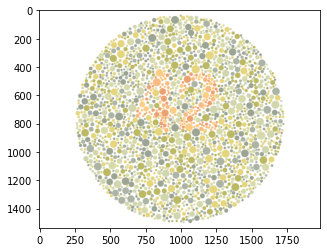

In [ ]:
 # charge le fichier dans une matrice de pixels couleur.
Data=image.imread("ishihara-0.png")

# affiche les dimensions de la matrice.
print(Data.dtype)
print(Data.shape[0:2])

# accède à la valeur du premier pixel.
print(Data[0,0,0]) 


# Visualisation image
plt.imshow(Data) 
plt.show()

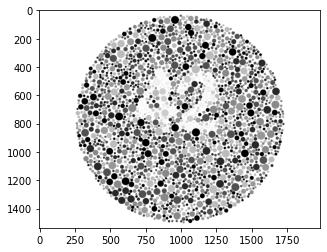

In [ ]:
# Decoupage de l'image en trois canaux et conversion en doubles :
R=Data[:,:,0]
V=Data[:,:,1]
B=Data[:,:,2]

# Affichage du canal R :
plt.imshow(R,cmap='gray') 
plt.show()


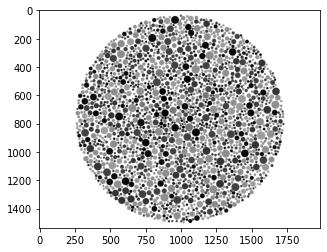

In [ ]:
# Affichage du canal V :
plt.imshow(V,cmap='gray') 
plt.show()



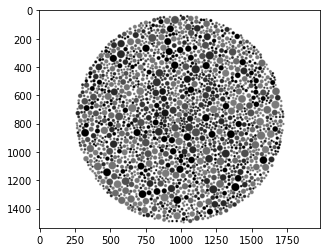

In [ ]:
# Affichage du canal B :
plt.imshow(B,cmap='gray') 
plt.show()



En affichant les matrices $I$, $R$, $V$ et $B$ sous forme d’images, on observe que les images sont similaires et on distingue un motif dans les nuances de rouge.

Dans la suite, les pixels sont considérés comme des points de $R^3$ que l’on affiche dans un repère dont les axes correspondent aux trois niveaux de couleur.

In [ ]:
# Transformation image en nuage de pixels 3D : les trois canaux sont vectorises et concatenes
R=np.ravel(R)
V=np.ravel(V)
B=np.ravel(B)

print(R.shape)

# Affichage du nuage de pixels dans le repere RVB :
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(R, V, B, c='b', marker='o')

ax.set_xlabel('Niveau de Rouge')
ax.set_ylabel('Niveau de Vert')
ax.set_zlabel('Niveau de Bleu')

plt.show()

(3048960,)


KeyboardInterrupt: ignored

 Ils forment un faisceau allongé suivant plusieurs directions, ce qui confirme l’observation précédente, à savoir que les trois canaux sont fortement corrélés.

### Etude de la corrélation entre les couleurs R, V et B

In [ ]:
# Matrice des donnees :
dim=R.shape[0]

# Les trois canaux sont vectorises et concatenes
X=np.zeros([dim,3])
X[:,0]=R
X[:,1]=V
X[:,2]=B

print(X.shape)

(3048960, 3)


In [ ]:
# Calculer la matrice de variance/covariance 
#récuperer taille matrice

#print(X.shape) #affiche taille de la matrice
#print(X.mean(0)) #moyenne des lignes)

#calcul du centre de gravité
g=X.mean(0)
print("Moyenne = ", g, "\n")

#centrer la matrice en fonction de c
Xc=X-g
#print(Xc)

#dot = multiplication de matrice
#.T = appel de la transposée
sigma=(Xc.T).dot(Xc)/Xc.shape[0]
print("Matrice de variance/covariance\n\n", sigma)





Moyenne =  [0.92628777 0.92142349 0.85439634] 

Matrice de variance/covariance

 [[0.01436858 0.01332363 0.02051961]
 [0.01332363 0.01396285 0.02297153]
 [0.02051961 0.02297153 0.04489739]]


In [ ]:
# Calculer les coefficients de correlation lineaire (np.corrcoef)
corr = np.corrcoef(sigma)
print("Matrice de corrélation\n\n", corr)

Matrice de corrélation

 [[1.         0.98123001 0.97451592]
 [0.98123001 1.         0.99948205]
 [0.97451592 0.99948205 1.        ]]


In [ ]:
# Calculer les proportions de contraste :

#somme des elts des colonnes
n=np.sum(sigma,axis=1)
print("n = ", n)

#somme des sommes
m=np.sum(n)
print("m = ", m)

#Liste des contrastes
#contrast de l'image = moyenne des contrastes locaux
L=[x/m for x in n]
print("\nListe des contrastes\n", L)


n =  [0.04821182 0.05025801 0.08838853]
m =  0.18685836099841757

Liste des contrastes
 [0.2580126558125479, 0.26896311336108497, 0.473024230826367]


## Exercice 2 - Analyse en Composantes Principales



Implémenter l'ACP :
1) extraire les 3 vecteurs propres, notés $X_1$, $X_2$, $X_3$, associés aux 3 plus grandes valeurs propres de la matrice de variance-covariance $\Sigma$ (par les fonctions *np.cov* et *np.linalg.eig*). Ces vecteurs propres constitueront le nouveau &
repère P c'est-à-dire les axes principaux.  
2) Projetez ensuite les données dans cette nouvelle base en les multipliant par la base $P = [X_1X_2X_3]$.

In [ ]:
# Matrice des donnees :
dim=R.shape[0]

# Les trois canaux sont vectorises et concatenes
X=np.zeros([dim,3])
X[:,0]=R
X[:,1]=V
X[:,2]=B

print(X.shape)

(3048960, 3)


Calculez la matrice de variance-covariance en utilisant par exemple la fonction **np.cov**

In [ ]:
# Matrice de variance/covariance :

sigma_2=np.cov(Xct)
print(sigma_2)


[[0.01436858 0.01332363 0.02051962]
 [0.01332363 0.01396285 0.02297154]
 [0.02051962 0.02297154 0.0448974 ]]


La matrice $\Sigma$ de variance/covariance est symétrique et réelle. Elle admet donc une base orthonormée de vecteurs propres.

Calculez ses valeurs propres et vecteurs propres à l'aide de l'appel à la fonction **np.linalg.eig**

In [ ]:
# Calcul des valeurs/vecteurs propres de Sigma :

valp,vecp = np.linalg.eig(sigma_2)
print("valeurs propres\n", valp)
print("\nvecteurs propres\n", vecp)

valeurs propres
 [0.0681779  0.00461629 0.00043465]

vecteurs propres
 [[-0.4130039  -0.75423633  0.51044621]
 [-0.4394815  -0.32585122 -0.83706451]
 [-0.79767399  0.57004257  0.19689509]]


In [ ]:
#  Tri des valeurs propres : 
print(valp)

[0.0681779  0.00461629 0.00043465]


 Calculez la matrice des **composantes principales** des pixels  Projetez ensuite les données dans cette nouvelle base en multipliant chaque vecteur par la base $P = [X_1X_2X_3]$.

In [ ]:
# Calcul des composantes principales 
#c'est à dire des coefficients de projection sur les axes principaux:

print("\nvecteurs propres\n", vecp)
print("\n",vecp.shape, sigma_2.shape)




vecteurs propres
 [[-0.4130039  -0.75423633  0.51044621]
 [-0.4394815  -0.32585122 -0.83706451]
 [-0.79767399  0.57004257  0.19689509]]

 (3, 3) (3, 3)


(3048960, 1)


<function matplotlib.pyplot.show(*args, **kw)>

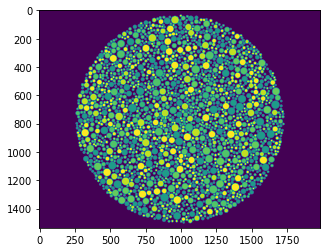

In [ ]:
# Projection sur la premiere composante principale :

#syntaxe [0,:]
#=> selection de la ligne 0
P1=vecp.T[0,:]

#reshape la nouvelle matrice à 3048960 lignes et 1 colonne
#tout repasser dans un vecteur a une dimension au lieu de 3
X1=np.dot(P1,Xct).reshape(3048960,1)

print(X1.shape)

#taille des images au dessus = (1536,1985)
# Affichage de cette projection

X1_im=X1.reshape(1536,1985)

plt.imshow(X1_im)
plt.show



(3048960, 1)


<function matplotlib.pyplot.show(*args, **kw)>

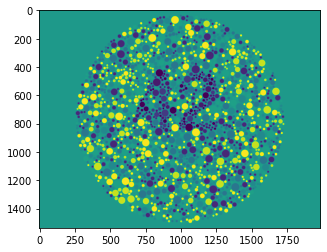

In [ ]:
# Projection sur la deuxieme composante principale :

P2=vecp.T[1,:]
X2=np.dot(P2,Xct).reshape(3048960,1)
print(X1.shape)

# Affichage de cette projection

X2_im=X2.reshape(1536,1985)

plt.imshow(X2_im)
plt.show



(3048960, 1)


<function matplotlib.pyplot.show(*args, **kw)>

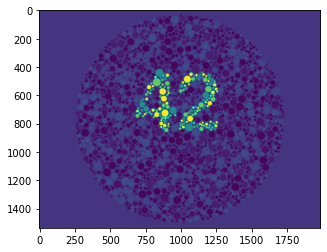

In [ ]:
# Projection sur la troisieme composante principale :

P3=vecp.T[2,:]
X3=np.dot(P3,Xct).reshape(3048960,1)
print(X3.shape)


# Affichage de cette projection

X3_im=X3.reshape(1536,1985)

plt.imshow(X3_im)
plt.show


## Etude la correlation dans le nouveau repère

In [ ]:
# Matrice de variance/covariance dans le nouveau repere :

sigma_nr=np.concatenate((X1,X2,X3),axis=1)
print(sigma_nr.shape)

sigma_nr2=np.cov(vecp.dot(Xc.T))
print(sigma_nr2)


(3048960, 3)
[[ 0.00405322  0.0062383   0.00137108]
 [ 0.0062383   0.06716103 -0.0053405 ]
 [ 0.00137108 -0.0053405   0.00201459]]


In [ ]:
# Coefficients de correlation lineaire :

corr2 = np.corrcoef(sigma_nr2)
print("Matrice de corrélation\n\n", corr2)


Matrice de corrélation

 [[ 1.          0.90758574 -0.87593721]
 [ 0.90758574  1.         -0.99754241]
 [-0.87593721 -0.99754241  1.        ]]


In [ ]:
# Proportions de contraste :

n=np.sum(sigma_nr2,axis=1)
print("n = ", n)

m=np.sum(n)
print("m = ", m)

L=[x/m for x in n]
print("\nListe des contrastes\n", L)

n =  [ 0.01166259  0.06805883 -0.00195483]
m =  0.07776659485463738

Liste des contrastes
 [0.14996919927857863, 0.8751679192107468, -0.025137118489325483]


### Interprétation

Le but du test de Ishihara est d'identifier les personnes qui ne distinguent pas, dans une image de luminance à peu près uniforme, un motif n'apparaissant que dans les chrominances. Il est donc voulu que l'on ne distingue le motif que dans la deuxième et/ou la troisième composante(s) principale(s). 

**Comment est-ce possible puisque le contraste est censé être maximal dans la première composante principale ?**

S. Ishihara a justement créé des images de sorte que le contraste soit faible entre les couleurs du motif et celles du reste de l'image, alors qu'il y a un fort contraste dans la luminance, grâce au fait que ses images contiennent beaucoup de pixels blancs (entre les taches colorées). 



## Exercice 3 - Quizz

Des symboles de la culture Geek se cachent dans des mosaïques d'Ishihara (archive *Quizz_GroupeXX.zip*).

Utilisez l'ACP pour les faire apparaître et à vous de les identifier !

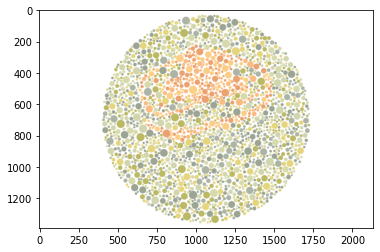

ValueError: ignored

In [ ]:
def print_img(n):
  Data=image.imread("ishihara-"+str(n)+".png")

  # Visualisation image
  plt.imshow(Data) 
  plt.show()
  return Data

def load(Data):
  R=Data[:,:,0]
  V=Data[:,:,1]
  B=Data[:,:,2]
  R=np.ravel(R)
  V=np.ravel(V)
  B=np.ravel(B)
  dim=R.shape[0]
  X=np.zeros([dim,3])
  X[:,0]=R
  X[:,1]=V
  X[:,2]=B

  return X,Data.shape[0:2]

def ACP(X,shape):
  sigma_2=np.cov(X.T)
  corr = np.corrcoef(sigma_2)
  valp,vecp = np.linalg.eig(corr)
  Images=[]

  for comp in range(3):
    new_P=vecp.T[comp,:]
    new_X=np.ravel(np.dot(new_P,X.T))
    new_X_im=X.reshape(shape)
    Images.append(new_X_im)
  return Images

X,s=load(print_img(50))
im1,im2,im3=ACP(X,s)

plt.imshow(im2) 
plt.show()
    
